## Context Questionnaire

## Import packages 

In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.anova import *

## Preprocessing 

In [15]:
# Data set loading
df_file = '/Users/tracysanchezpacheco/OneDrive/PhD/DataAnalysis/DataAnalysis/ContextQuestionnaire/ContextQuest.csv'
df = pd.read_csv(df_file, sep= ',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column                                                                              Non-Null Count  Dtype 
---  ------                                                                              --------------  ----- 
 0   Timestamp                                                                           20 non-null     object
 1   ID                                                                                  20 non-null     int64 
 2   1. The avatars increased my feeling of presence in the Virtual environment. ​       20 non-null     int64 
 3   2. The Virtual environment was more natural with avatars in it.                     20 non-null     int64 
 4   ​3. I felt like I was with other people in the city                                 20 non-null     int64 
 5   4. The exploration of the virtual town felt similar to exploring a real world city  20 non-null     int64 
dt

In [16]:
df.tail()

,Timestamp,ID,1. The avatars increased my feeling of presence in the Virtual environment. ​,2. The Virtual environment was more natural with avatars in it.,​3. I felt like I was with other people in the city,4. The exploration of the virtual town felt similar to exploring a real world city
15,3/23/2022 15:41:22,8695,2,2,1,2
16,4/20/2022 20:46:02,3976,5,6,2,2
17,4/21/2022 12:36:34,5531,6,7,2,2
18,5/4/2022 15:06:47,7412,5,4,4,5
19,5/6/2022 9:58:24,4796,5,4,2,5


In [17]:
#Renaming the column names 
column_names = ['timeStamp', 'ID', 'item1', 'item2', 'item3', 'item4']
df.columns = column_names
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timeStamp  20 non-null     object
 1   ID         20 non-null     int64 
 2   item1      20 non-null     int64 
 3   item2      20 non-null     int64 
 4   item3      20 non-null     int64 
 5   item4      20 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.1+ KB


In [18]:
# From a wide format to a long format 
Long = pd.melt(df, id_vars=['ID'], value_vars=['item1', 'item2', 'item3', 'item4'], var_name='item', value_name='likert')
Long.head()

,ID,item,likert
0,8469,item1,4
1,7264,item1,7
2,3572,item1,4
3,365,item1,3
4,6642,item1,6


In [19]:
# Calculating the average for all context items 
df['ContextQ_average'] = df[['item1','item2', 'item3', 'item4']].mean(axis=1)
df.head()

,timeStamp,ID,item1,item2,item3,item4,ContextQ_average
0,11/12/2021 16:35:32,8469,4,6,4,4,4.5
1,11/15/2021 15:05:58,7264,7,7,3,5,5.5
2,11/17/2021 13:37:14,3572,4,5,2,5,4.0
3,11/18/2021 12:14:47,365,3,4,2,5,3.5
4,11/30/2021 11:31:21,6642,6,6,3,3,4.5


## Write CSV file

In [20]:
os.chdir('/Users/tracysanchezpacheco/Documents/Resources')
df.to_csv('ContextQuest.csv')

In [21]:
df.describe()

,ID,item1,item2,item3,item4,ContextQ_average
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,5721.050000,4.600000,4.950000,2.550000,3.650000,3.937500
std,2575.483613,1.535544,1.356272,1.234376,1.496487,0.802443
min,365.000000,1.000000,2.000000,1.000000,2.000000,1.750000
25%,4126.000000,4.000000,4.000000,2.000000,2.000000,3.687500
50%,5636.000000,5.000000,4.500000,2.000000,3.500000,4.000000
75%,7519.500000,5.250000,6.000000,3.000000,5.000000,4.312500
max,9502.000000,7.000000,7.000000,5.000000,6.000000,5.500000


## Data Visualization

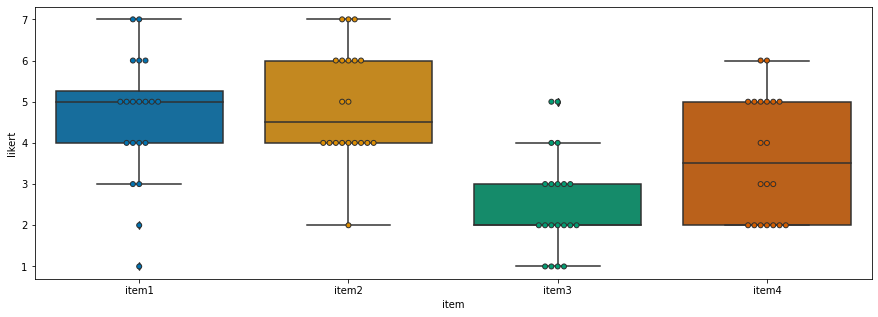

In [22]:
sns.set_palette('colorblind')
dy='item'; dx='likert'; ort='H';  sigma = .2
#Change y axist from 1 to seven
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(data= Long, x=dy, y=dx, ax=ax)
sns.swarmplot(data= Long, x=dy, y=dx,  ax=ax, linewidth=1)

plt.show()

In [23]:
LongAv = pd.melt(df, id_vars=['ID'], value_vars=['ContextQ_average'], var_name='item', value_name='likert')
LongAv.head()

,ID,item,likert
0,8469,ContextQ_average,4.5
1,7264,ContextQ_average,5.5
2,3572,ContextQ_average,4.0
3,365,ContextQ_average,3.5
4,6642,ContextQ_average,4.5


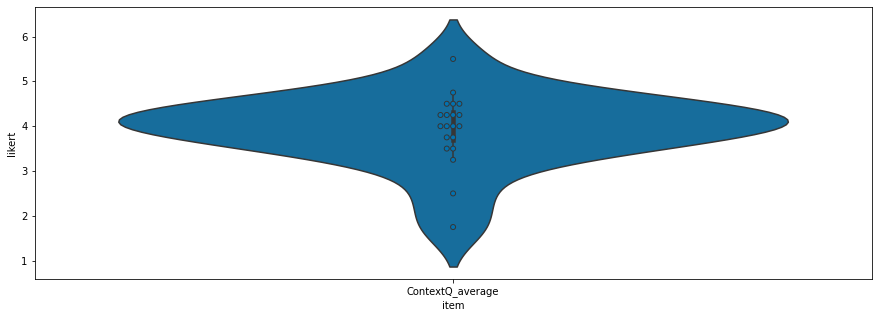

In [24]:
dy='item'; dx='likert'; ort='H'; pal = sns.set_palette('colorblind'); sigma = .2

fig, ax = plt.subplots(figsize=(15,5))
sns.violinplot(data= LongAv, x=dy, y=dx, ax=ax)
sns.swarmplot(data= LongAv, x=dy, y=dx,  ax=ax, linewidth=1)

plt.show()